In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import seaborn as sns
from collections import Counter
import ast

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/C/games_march2025_cleaned.csv')
display(df.head(10))

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,3.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,682,2434,306,80,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,1168020,76,12608
5,440,Team Fortress 2,2007-10-10,0,0.00,1,'The most fun you can have online' - PC Gamer ...,'The most fun you can have online' - PC Gamer ...,Nine distinct classes provide a broad range of...,NaN,...,0,0,0,0,50817,"{'Free to Play': 62868, 'Hero Shooter': 61020,...",89,1146642,93,8172
6,105600,Terraria,2011-05-16,0,9.99,2,"Dig, Fight, Explore, Build: The very world is ...","Dig, Fight, Explore, Build: The very world is ...","Dig, fight, explore, build! Nothing is impossi...",NaN,...,0,0,0,0,30516,"{'Open World Survival Craft': 16365, 'Sandbox'...",97,1102434,96,8860
7,252490,Rust,2018-02-08,0,39.99,4,The only aim in Rust is to survive. Everything...,The only aim in Rust is to survive. Everything...,The only aim in Rust is to survive. Everything...,"“Rust is one of the cruelest games on Steam, a...",...,836,3675,231,0,200902,"{'Survival': 18592, 'Crafting': 11822, 'Multip...",87,993856,87,14960
8,4000,Garry's Mod,2006-11-29,0,5.99,0,Garry's Mod is a physics sandbox. There aren't...,Garry's Mod is a physics sandbox. There aren't...,Garry's Mod is a physics sandbox. There aren't...,“It brings back the silly glee of unbridled ex...,...,100,1173,136,40,32384,"{'Sandbox': 18706, 'Moddable': 14479, 'Multipl...",96,985010,96,8277
9,1172470,Apex Legends™,2020-11-04,0,0.00,0,Apex Legends: Takeover About the Game Conquer ...,"Conquer with character in Apex Legends, a free...","Apex Legends is the award-winning, free-to-pla...",“The champion of Battle Royales.” 9/10 – GameS...,...,548,667,211,0,151844,"{'Free to Play': 2170, 'Battle Royale': 1483, ...",67,983230,53,7054


### Játékok átlagos ára évenként a Steamen

Ez a szakasz a játékok átlagos árának alakulását vizsgálja évenként a Steam platformon. A kód kiszámolja az átlagárat minden évre, majd egy vonaldiagramon jeleníti meg az eredményt, hogy láthatóvá váljon az árak időbeli trendje.

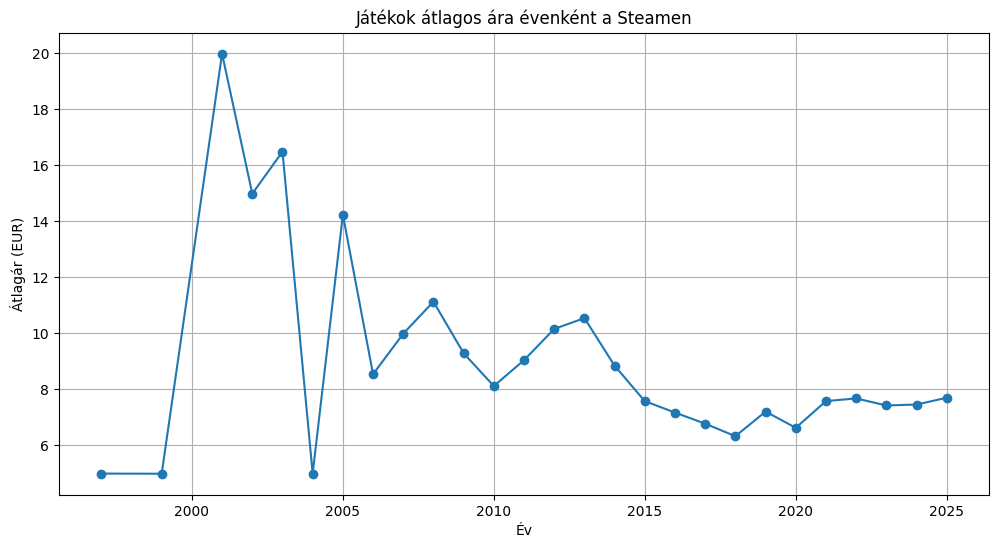

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

year_price = df.groupby('year')['price'].mean()

plt.figure(figsize=(12,6))
plt.plot(year_price.index, year_price.values, marker='o')
plt.title("Játékok átlagos ára évenként a Steamen")
plt.xlabel("Év")
plt.ylabel("Átlagár (EUR)")
plt.grid(True)
plt.show()

### Játék megjelenések száma évenként és hónaponként (Hőtérkép)

Ez a szakasz a játékok megjelenésének mintázatát vizsgálja évenként és hónaponként egy hőtérkép segítségével. A kód összesíti a megjelenések számát minden hónapban az egyes években, majd a hőtérkép vizuálisan megjeleníti a sűrűbben és ritkábban előforduló megjelenési időszakokat.

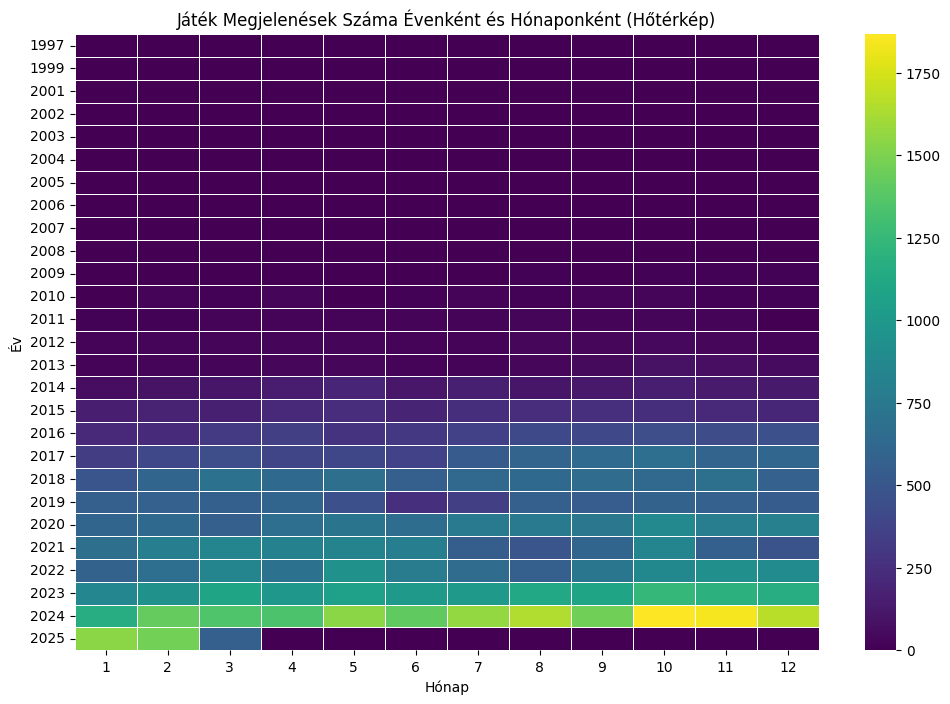

In [13]:
df['month'] = df['release_date'].dt.month
releases_heatmap_data = df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(releases_heatmap_data, cmap="viridis", fmt="d", linewidths=.5)
plt.title('Játék Megjelenések Száma Évenként és Hónaponként (Hőtérkép)')
plt.xlabel('Hónap')
plt.ylabel('Év')

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
ax.set_yticks(np.arange(len(releases_heatmap_data.index)) + 0.5)
ax.set_yticklabels(releases_heatmap_data.index.astype(int))

ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
ax.set_xticks(np.arange(len(releases_heatmap_data.columns)) + 0.5)
ax.set_xticklabels(releases_heatmap_data.columns.astype(int))

plt.show()

### Játék árak eloszlása

Ez a szakasz a játékok árának eloszlását vizsgálja a Steam platformon. A kód egy hisztogramot készít, amely bemutatja, milyen gyakran fordulnak elő bizonyos ártartományok a játékok között.

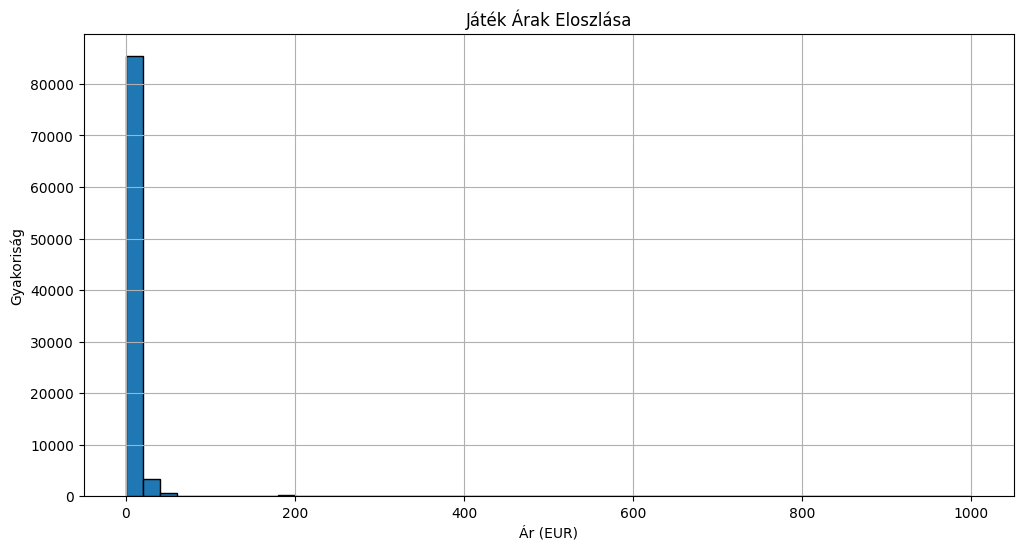

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Játék Árak Eloszlása')
plt.xlabel('Ár (EUR)')
plt.ylabel('Gyakoriság')
plt.grid(True)
plt.show()

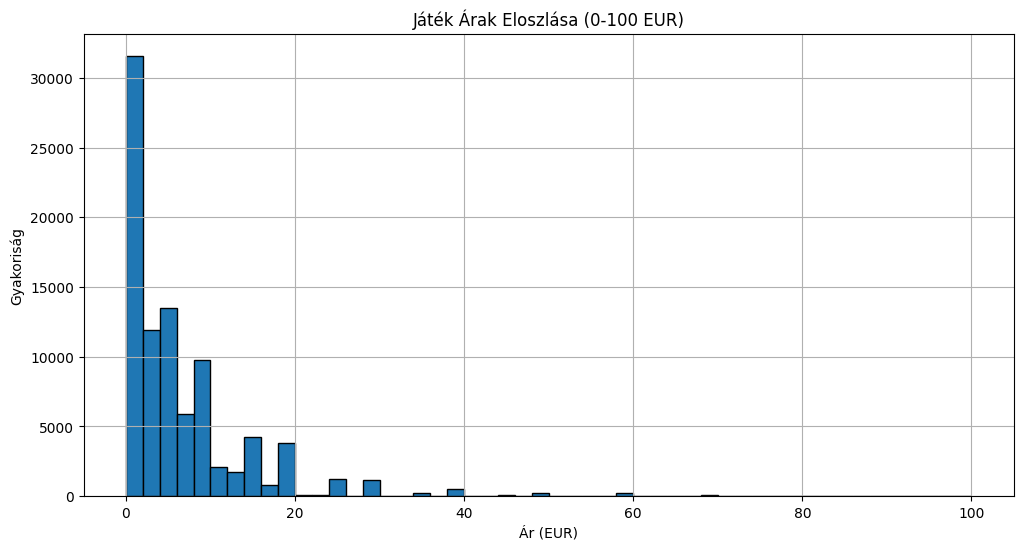

In [15]:
plt.figure(figsize=(12, 6))
df_filtered_price = df[(df['price'] >= 0) & (df['price'] <= 100)]
plt.hist(df_filtered_price['price'], bins=50, edgecolor='black')
plt.title('Játék Árak Eloszlása (0-100 EUR)')
plt.xlabel('Ár (EUR)')
plt.ylabel('Gyakoriság')
plt.grid(True)
plt.show()

### Játékok száma évenként

Ez a szakasz a Steam-en megjelenő játékok számának alakulását vizsgálja évenként. A kód megszámolja a játékok számát minden évre, majd egy oszlopdiagramon jeleníti meg az eredményt, hogy láthatóvá váljon a megjelenések számának időbeli trendje.

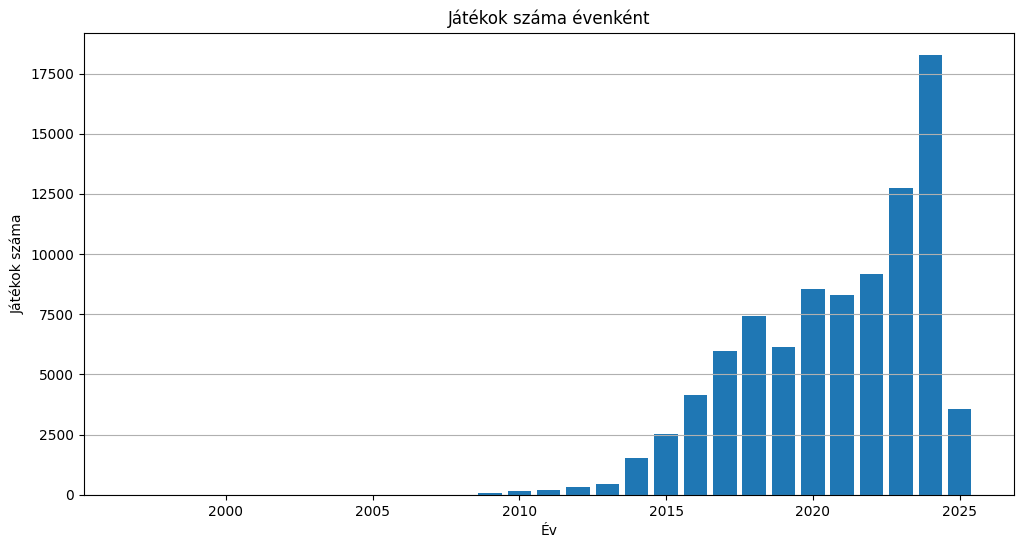

In [16]:
if 'year' not in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['year'] = df['release_date'].dt.year

games_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.title('Játékok száma évenként')
plt.xlabel('Év')
plt.ylabel('Játékok száma')
plt.grid(axis='y')
plt.show()

### Top 20 Játék Műfaj Száma

Ez a szakasz a leggyakoribb játék műfajokat vizsgálja a Steam-en. A kód kinyeri az összes műfajt a datasetből, megszámolja az egyes műfajok előfordulását, majd egy oszlopdiagramon megjeleníti a 20 leggyakoribb műfajt.

<Figure size 1200x800 with 0 Axes>

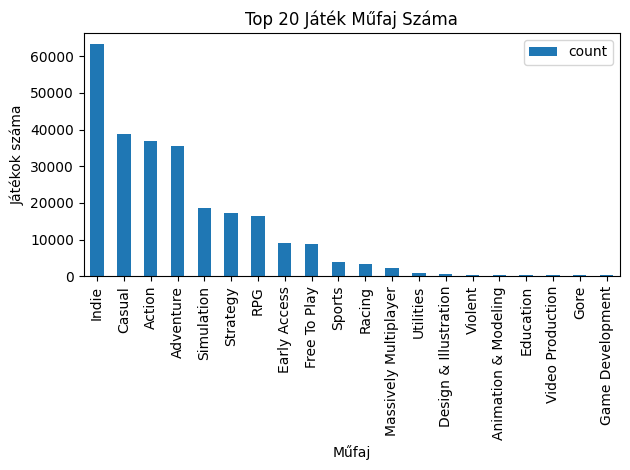

In [17]:
df['genres_list'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [x])

genres_list = sum(df['genres_list'], [])

cleaned_genres = [g.strip() for g in genres_list if isinstance(g, str) and g.strip() != ""]

genre_counts = Counter(cleaned_genres)

genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

top_n = 20
plt.figure(figsize=(12, 8))
genre_df.head(top_n).plot(kind='bar', legend=True)
plt.title(f'Top {top_n} Játék Műfaj Száma')
plt.xlabel('Műfaj')
plt.ylabel('Játékok száma')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Játékok száma az ajánlott életkor szerint

Ez a szakasz a játékok számának eloszlását vizsgálja az ajánlott életkor szerint a Steam-en. A kód megszámolja a játékok számát minden korosztályra, majd egy oszlopdiagramon jeleníti meg az eredményt, hogy láthatóvá váljon a korosztály szerinti megoszlás.

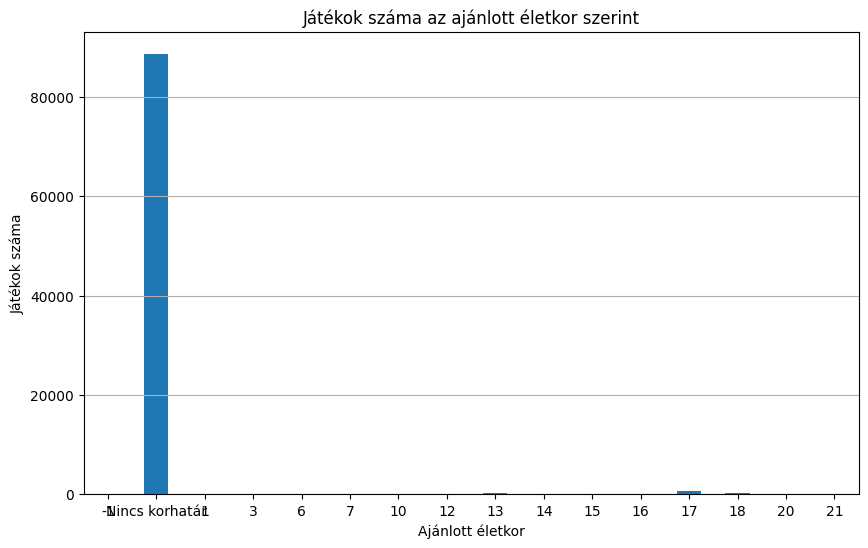

In [18]:
age_counts = df['required_age'].value_counts().sort_index()

age_counts = age_counts.rename(index={0: 'Nincs korhatár'})

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.title('Játékok száma az ajánlott életkor szerint')
plt.xlabel('Ajánlott életkor')
plt.ylabel('Játékok száma')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Játékok száma támogatott platformonként

Ez a szakasz a játékok platformtámogatását vizsgálja a Steam-en. A kód megszámolja, hány játék érhető el Windows, Mac és Linux platformon, majd egy oszlopdiagramon megjeleníti az eredményt, hogy láthatóvá váljon a platform szerinti megoszlás.

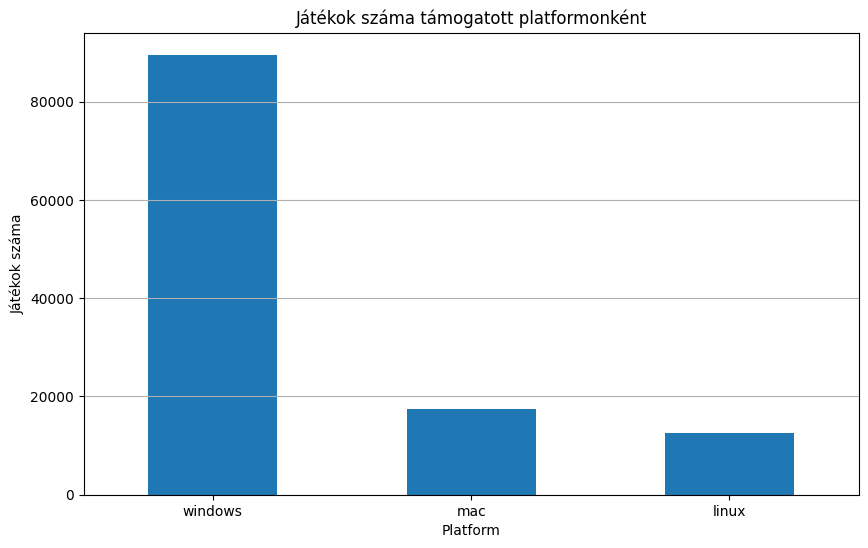

In [19]:
platforms = ['windows', 'mac', 'linux']
platform_counts = {platform: df[platform].sum() for platform in platforms}

platforms_series = pd.Series(platform_counts)

plt.figure(figsize=(10, 6))
platforms_series.plot(kind='bar')
plt.title('Játékok száma támogatott platformonként')
plt.xlabel('Platform')
plt.ylabel('Játékok száma')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Metacritic értékek az ár függvényében

Ez a szakasz a játékok Metacritic értéke és az ár közötti kapcsolatot vizsgálja a Steam-en. A kód egy szórást diagramon (scatterplot) ábrázolja a Metacritic értéket az ár függvényében, hogy láthatóvá váljon, van-e összefüggés a kettő között.

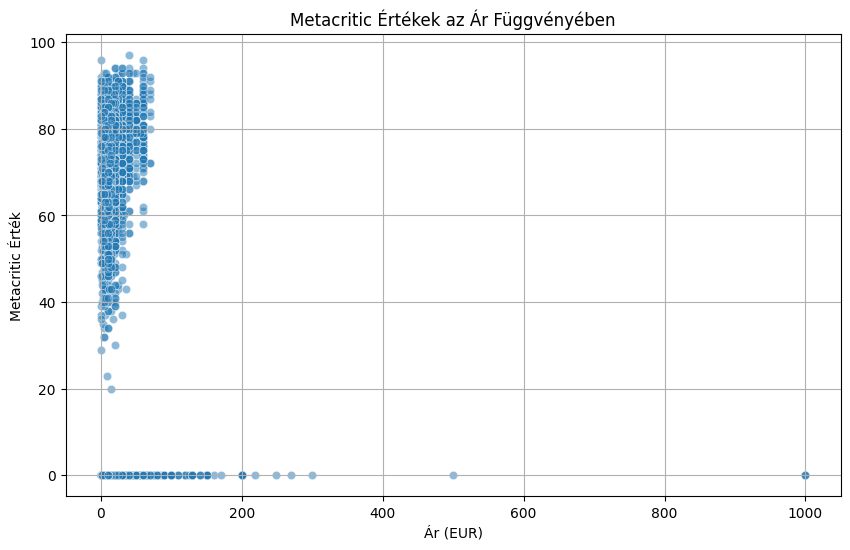

In [20]:
df_filtered = df.dropna(subset=['metacritic_score'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='price', y='metacritic_score', alpha=0.5)
plt.title('Metacritic Értékek az Ár Függvényében')
plt.xlabel('Ár (EUR)')
plt.ylabel('Metacritic Érték')
plt.grid(True)
plt.show()

### Metacritic értékek a kiadási év függvényében

Ez a szakasz a játékok Metacritic értéke és a kiadási év közötti kapcsolatot vizsgálja a Steam-en. A kód egy szórást diagramon (scatterplot) ábrázolja a Metacritic értéket a kiadási év függvényében, hogy láthatóvá váljon, van-e összefüggés a kettő között.

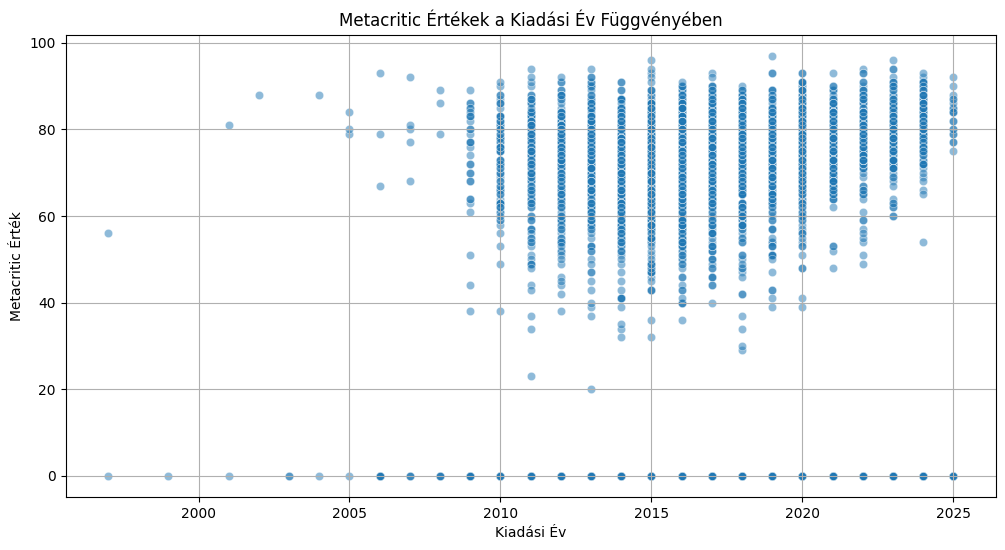

In [21]:
df_filtered = df.dropna(subset=['metacritic_score', 'year'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='year', y='metacritic_score', alpha=0.5)
plt.title('Metacritic Értékek a Kiadási Év Függvényében')
plt.xlabel('Kiadási Év')
plt.ylabel('Metacritic Érték')
plt.grid(True)
plt.show()

### Metacritic értékek az ajánlott életkor függvényében

Ez a szakasz a játékok Metacritic értéke és az ajánlott életkor közötti kapcsolatot vizsgálja a Steam-en. A kód egy dobozdiagramon (boxplot) ábrázolja a Metacritic értéket az ajánlott életkor függvényében, hogy láthatóvá váljon, hogyan oszlik meg a Metacritic érték a különböző korosztályokban.

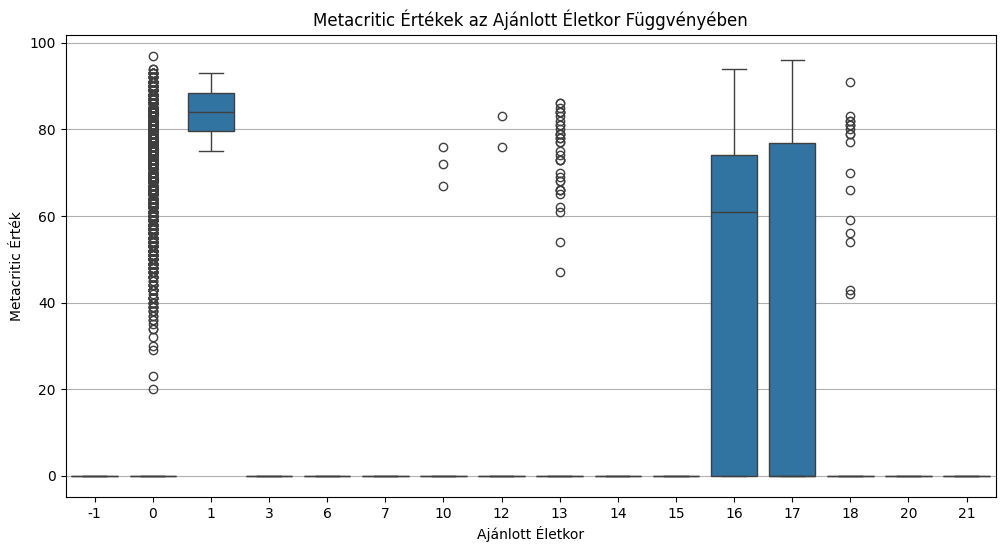

In [22]:
df_filtered = df.dropna(subset=['metacritic_score'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='required_age', y='metacritic_score')
plt.title('Metacritic Értékek az Ajánlott Életkor Függvényében')
plt.xlabel('Ajánlott Életkor')
plt.ylabel('Metacritic Érték')
plt.grid(axis='y')
plt.show()